In [15]:
import numpy as np
import pandas as pd

In [16]:
df= pd.read_csv('Iris.csv')

In [17]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
df=df.iloc[:,1:]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df['Species']= encoder.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
df= df[df['Species']!=0][['SepalWidthCm','PetalLengthCm', 'Species']]
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [33]:
df.shape

(100, 3)

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

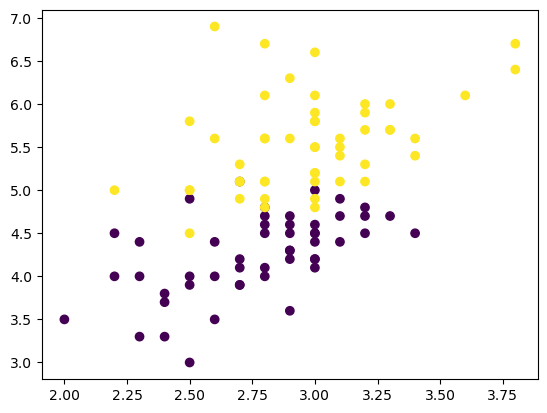

In [27]:
plt.scatter(df['SepalWidthCm'], df['PetalLengthCm'], c=df['Species'])

In [30]:
df_train= df.iloc[:60,:].sample(10)
df_train.head()

,SepalWidthCm,PetalLengthCm,Species
93,2.3,3.3,1
74,2.9,4.3,1
96,2.9,4.2,1
60,2.0,3.5,1
85,3.4,4.5,1


In [31]:
df_train= df.iloc[:60, :].sample(10)
df_val= df.iloc[60:80, :].sample(5)
df_test= df.iloc[80:, :].sample(5)

In [34]:
df_train

,SepalWidthCm,PetalLengthCm,Species
87,2.3,4.4,1
62,2.2,4.0,1
106,2.5,4.5,2
109,3.6,6.1,2
82,2.7,3.9,1
68,2.2,4.5,1
60,2.0,3.5,1
83,2.7,5.1,1
108,2.5,5.8,2
104,3.0,5.8,2


In [35]:
df_val

,SepalWidthCm,PetalLengthCm,Species
117,3.8,6.7,2
119,2.2,5.0,2
114,2.8,5.1,2
124,3.3,5.7,2
116,3.0,5.5,2


In [36]:
df_test

,SepalWidthCm,PetalLengthCm,Species
137,3.1,5.5,2
142,2.7,5.1,2
131,3.8,6.4,2
136,3.4,5.6,2
139,3.1,5.4,2


In [40]:
x_test= df_val.iloc[:,:2].values
y_test= df_val.iloc[:,-1].values

In [41]:
y_test

array([2, 2, 2, 2, 2])

In [42]:
x_test

array([[3.8, 6.7],
       [2.2, 5. ],
       [2.8, 5.1],
       [3.3, 5.7],
       [3. , 5.5]])

# Case-1 Bagging

In [52]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

x = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
62,2.2,4.0,1
106,2.5,4.5,2
82,2.7,3.9,1
106,2.5,4.5,2
108,2.5,5.8,2
83,2.7,5.1,1
82,2.7,3.9,1
83,2.7,5.1,1


In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [63]:
def evaluate(clfr, x, y):
    clfr.fit(x,y)
    plot_tree(clfr)
    plt.show()
    plot_decision_regions(x.values, y.values, clf= clfr, legend=2)
    y_pred=clfr.predict(x_test)
    print(accuracy_score(y_test,y_pred))

In [64]:
dt_bag1= DecisionTreeClassifier()

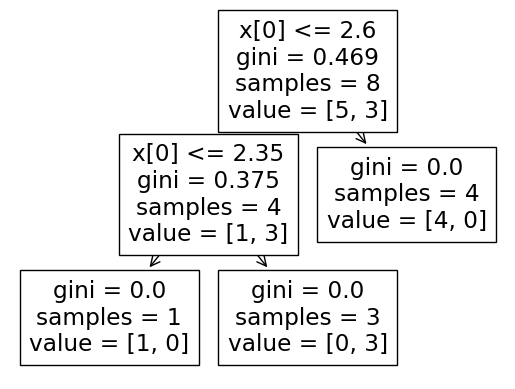

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.0


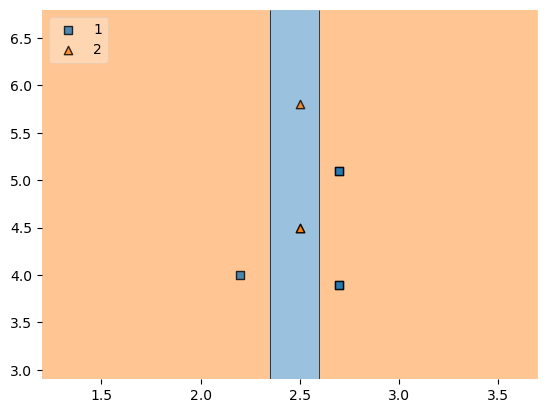

In [65]:
evaluate(dt_bag1,x,y)

In [66]:
# data bag for tree2
df_bag = df_train.sample(8,replace=True)

x = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
62,2.2,4.0,1
62,2.2,4.0,1
104,3.0,5.8,2
106,2.5,4.5,2
87,2.3,4.4,1
108,2.5,5.8,2
108,2.5,5.8,2
68,2.2,4.5,1


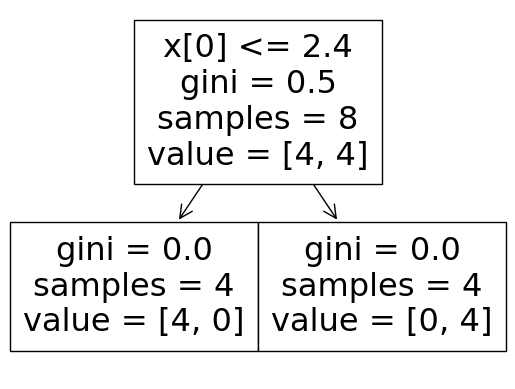

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


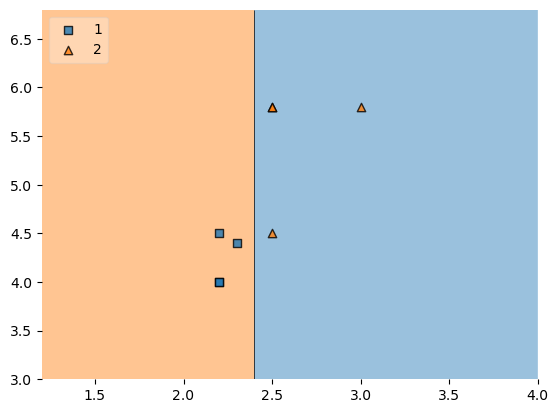

In [67]:
dt_bag2= DecisionTreeClassifier()
evaluate(dt_bag2, x,y)

In [68]:
# data bag for tree3
df_bag = df_train.sample(8,replace=True)

x = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
68,2.2,4.5,1
108,2.5,5.8,2
82,2.7,3.9,1
108,2.5,5.8,2
62,2.2,4.0,1
60,2.0,3.5,1
82,2.7,3.9,1
106,2.5,4.5,2


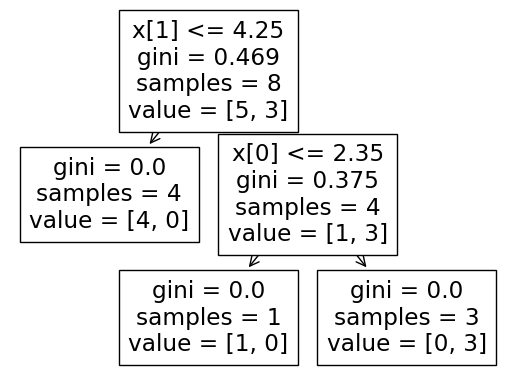

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


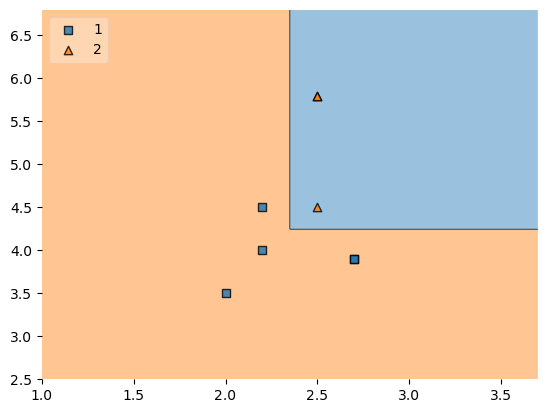

In [69]:
dt_bag3= DecisionTreeClassifier()
evaluate(dt_bag3, x,y)

In [73]:
# predict

In [74]:
df_test

,SepalWidthCm,PetalLengthCm,Species
137,3.1,5.5,2
142,2.7,5.1,2
131,3.8,6.4,2
136,3.4,5.6,2
139,3.1,5.4,2


In [72]:
print("Predictor 1",dt_bag1.predict(np.array([3.1,5.4]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([3.1,5.4]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.1,5.4]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [2]
Predictor 3 [2]


C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [75]:
# row sampling without replacement

In [76]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
83,2.7,5.1,1
104,3.0,5.8,2
106,2.5,4.5,2
68,2.2,4.5,1
60,2.0,3.5,1
62,2.2,4.0,1
108,2.5,5.8,2
82,2.7,3.9,1


# Row subspaces
#### sampling with replacement across cols

In [77]:
df1= pd.read_csv('Iris.csv')
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [78]:
df1.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
47,48,4.6,3.2,1.4,0.2,Iris-setosa
42,43,4.4,3.2,1.3,0.2,Iris-setosa
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
6,7,4.6,3.4,1.4,0.3,Iris-setosa
15,16,5.7,4.4,1.5,0.4,Iris-setosa
136,137,6.3,3.4,5.6,2.4,Iris-virginica
111,112,6.4,2.7,5.3,1.9,Iris-virginica
32,33,5.2,4.1,1.5,0.1,Iris-setosa
34,35,4.9,3.1,1.5,0.1,Iris-setosa
104,105,6.5,3.0,5.8,2.2,Iris-virginica


In [80]:
df1.sample(2, replace=True, axis=1)

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


# Random Patches
#### sampling with replacement using both rows and cols

In [82]:
df1.sample(2, replace=True, axis=1).sample(8, replace=True)

,SepalLengthCm,PetalLengthCm
140,6.7,5.6
57,4.9,3.3
24,4.8,1.9
118,7.7,6.9
31,5.4,1.5
135,7.7,6.1
25,5.0,1.6
29,4.7,1.6
